**Have a look at our hypothetical web startup, MLAAS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of our company, the demand for better infrastructure also increases to serve all incoming web requests successfully. We don't want to allocate too many resources as that would be too costly. On the other hand, we will lose money if we have not reserved enough resources for serving all incoming requests. The question now is, when will we hit the limit of our current infrastructure, which we estimated being 100,000 requests per hour. We would like to know in advance when we have to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.**

**Import Libraries**

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

pd.read_csv('web_traffic.tsv')

In [45]:
# import the dataset

dataset = pd.read_csv('web_traffic.tsv',delimiter='\t',header = None)

In [50]:
dataset.head()

,Hours,Hits
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [48]:
dataset.columns = ['Hours','Hits']

**Step -1 : See the dataset and information about the data**

In [49]:
print(dataset.keys())
print(dataset.info())

Index(['Hours', 'Hits'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 2 columns):
Hours    743 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 11.7 KB
None


### Data Preprocessing

**Cleaning Data**
- Handling missing values

In [51]:
# Remove the missing value
dataset = dataset.dropna(axis = 0) 
# axis = 0 -> removing row or instance
# axis = 1 -> removing coloumn or attributes

In [52]:
dataset.head()

,Hours,Hits
0,1,2272.0
2,3,1386.0
3,4,1365.0
4,5,1488.0
5,6,1337.0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 742
Data columns (total 2 columns):
Hours    735 non-null int64
Hits     735 non-null float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [53]:
plt.style.use('fivethirtyeight')

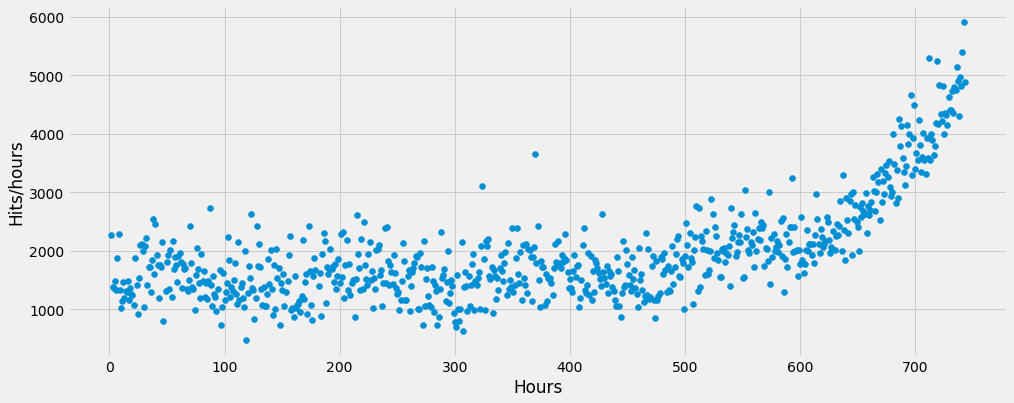

In [42]:
# scatter plot
plt.figure(figsize=(15,6))
plt.scatter(dataset[0], dataset[1])
plt.xlabel('Hours')
plt.ylabel('Hits/hours')
plt.show()

In [56]:
dataset.corr()

,Hours,Hits
Hours,1.000000,0.645232
Hits,0.645232,1.000000


In [8]:
X = dataset.iloc[:,0:1].values # independent varible
y = dataset.iloc[:,1:2].values # dependent variable

In [9]:
X.shape , y.shape

((735, 1), (735, 1))

In [10]:
# splitting data into training and testing
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2 ,
                                                    random_state =0)

In [12]:
X_train.shape, X_test.shape

((588, 1), (147, 1))

# Building a simple linear regression model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()


In [15]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Evaluation 

In [16]:
regressor.score(X_test,y_test)

0.42111780477482985

# Regression line

In [17]:
y_pred = regressor.predict(dataset.iloc[:,0:1].values)

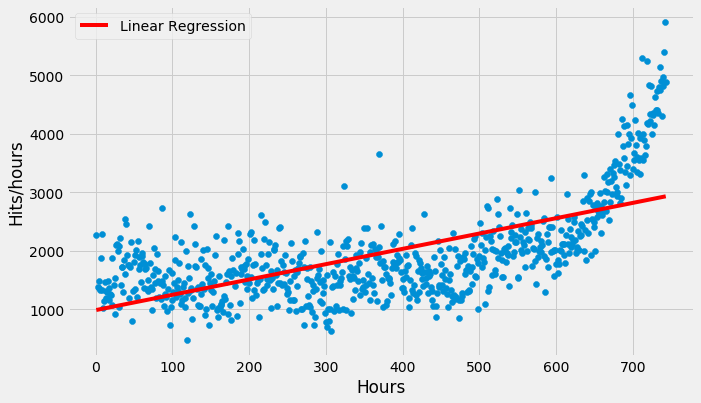

In [18]:
# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(dataset[0], dataset[1])

plt.plot(dataset.iloc[:,0:1], y_pred , 'r')


plt.xlabel('Hours')
plt.ylabel('Hits/hours')
plt.legend(['Linear Regression'])
plt.show()

In [19]:
b1 = regressor.coef_
b0 = regressor.intercept_

In [20]:
b0,b1

(array([988.56785837]), array([[2.61731891]]))

In [21]:
no_hours = (100000 - b0) / b1

In [22]:
print('# of hours the it might hit 1,00,000 hits\hour is :', no_hours)

# of hours the it might hit 1,00,000 hits\hour is : [[37829.33431331]]


In [23]:
dataset.corr()

,0,1
0,1.000000,0.645232
1,0.645232,1.000000


# Adding Polynominal Degree

In [24]:
X2 = np.concatenate((X,X**2),axis = 1)
X2_train = np.concatenate((X_train,X_train**2), axis = 1)
X2_test = np.concatenate((X_test,X_test**2), axis = 1)

In [25]:
polyreg = LinearRegression()

In [26]:
polyreg.fit(X2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print('R square for degree = 2 is ',polyreg.score(X2_test,y_test))

R square for degree = 2 is  0.6201650376966681


In [28]:
y2_pred = polyreg.predict(X2)

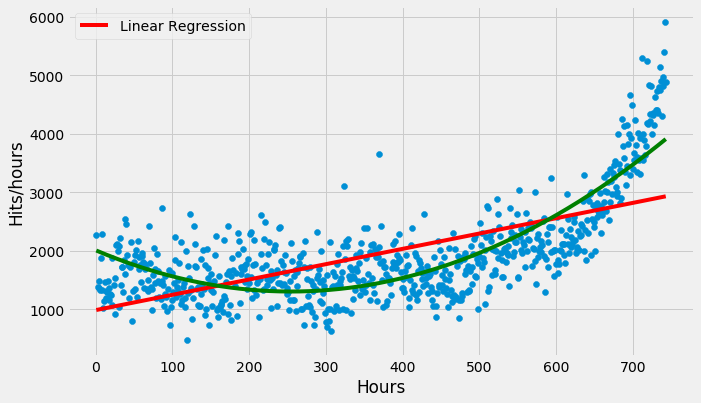

In [29]:
# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(dataset[0], dataset[1])

plt.plot(dataset.iloc[:,0:1], y_pred , 'r')
plt.plot(dataset.iloc[:,0:1], y2_pred , 'g')


plt.xlabel('Hours')
plt.ylabel('Hits/hours')
plt.legend(['Linear Regression'])
plt.show()

In [30]:
b = polyreg.coef_
b0 = polyreg.intercept_

In [31]:
b

array([[-5.54746985,  0.01090471]])

In [32]:
b0

array([2012.41816258])

In [33]:
np.roots([0.01, -5.54, -97988])

array([ 3419.53544133, -2865.53544133])

In [34]:
3419/(24)

142.45833333333334

In [35]:
37829.33431331/24

1576.2222630545832